<h1 style = "font-size:3rem;color:DarkCyan">Feature Comparison between audio files</h1>

In [1]:
#import libraries
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import librosa, librosa.display 
import IPython.display as ipd
import scipy
import os
import pandas as pd

import sklearn

In [2]:
# import dataset, in this case different percussion sounds

filenames = os.listdir('./data')
print(f'Number of audio files: {len(filenames)} ')


Number of audio files: 167 


<h2 style = "font-size:2rem;color:DarkCyan">Extracting features</h2>

- Extracting features (Bandwidth, central spectroid, and zero-crossing rate) for each audio file, and store in a NxF matrix
- Giving a label

In [27]:
def extract_features(data):
    return [
        np.mean(librosa.feature.spectral_centroid(y = data)),
        np.mean(librosa.feature.spectral_bandwidth(y = data)),
        np.mean(librosa.feature.spectral_flatness(y = data)),
        np.mean(librosa.feature.spectral_rolloff(y = data)),
        np.mean(librosa.feature.zero_crossing_rate(y = data)),
        np.mean(librosa.feature.rms(y = data))
        
    ]

#np.mean(librosa.feature.zero_crossing_rate(y = data)),

In [11]:
def get_label(name):
    if name.find('clap') != -1:
        return 0
    elif name.find('cymbal') != -1:
        return 1
    elif name.find('kick') != -1:
        return 2
    else:
        return 3

In [29]:
sr = 48000
features = np.zeros((len(filenames), 6))
labels = np.zeros(len(filenames))

idx = 0

for name in filenames:
    data, dummy = librosa.load('./data/'+name, sr = sr, mono=True)
    
    # fill prediction array with correct label 
    labels[idx] = get_label(name)
    
    # extract features
    features[idx] = extract_features(data)
    
    idx +=1
    

<h2 style = "font-size:2rem;color:DarkCyan">Plotting features</h2>

<IPython.core.display.Javascript object>


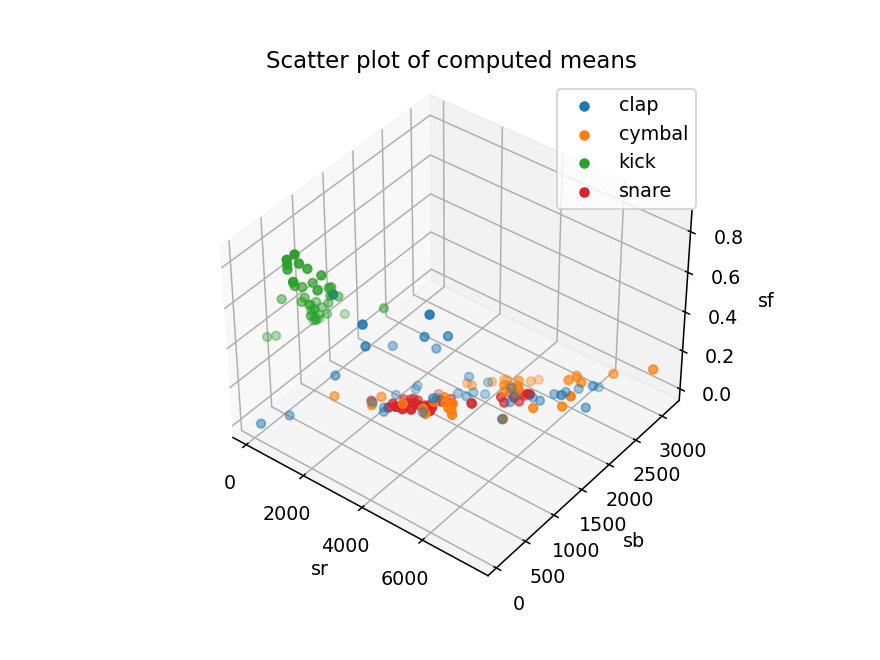

In [30]:
f_dict = {'sc' : 0, 'sb' : 1, 'sf': 2, 'sr' : 3, 'zcr' : 4, 'rms': 5}
# choose three features

f1 = 'sr'
f2 = 'sb'
f3 = 'sf'

# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 0),f_dict[f1]], features[np.where(labels == 0),f_dict[f2]], features[np.where(labels == 0),f_dict[f3]], label = 'clap')
ax.scatter3D(features[np.where(labels == 1),f_dict[f1]], features[np.where(labels == 1),f_dict[f2]], features[np.where(labels == 1),f_dict[f3]], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 2),f_dict[f1]], features[np.where(labels == 2),f_dict[f2]], features[np.where(labels == 2),f_dict[f3]], label = 'kick')
ax.scatter3D(features[np.where(labels == 3),f_dict[f1]], features[np.where(labels == 3),f_dict[f2]], features[np.where(labels == 3),f_dict[f3]], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
ax.legend()

<h2 style = "font-size:2rem;color:DarkCyan">2. Scale features & plot again</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [31]:
print('Mean and std before scaling',np.mean(features, axis=0),np.std(features, axis=0))

features = sklearn.preprocessing.scale(features)

print('Mean and std after scaling',np.mean(features, axis=0),np.std(features, axis=0))

Mean and std before scaling [1.60794752e+03 1.46614746e+03 1.78297782e-01 3.14417057e+03
 8.94566901e-02 5.07136850e-02] [8.95756004e+02 7.02382780e+02 2.59673601e-01 1.77189515e+03
 6.32586899e-02 8.92786962e-02]
Mean and std after scaling [-9.67954924e-16 -3.90240069e-16  7.97765048e-18  4.21485867e-16
 -5.63753967e-16  4.48742839e-17] [1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


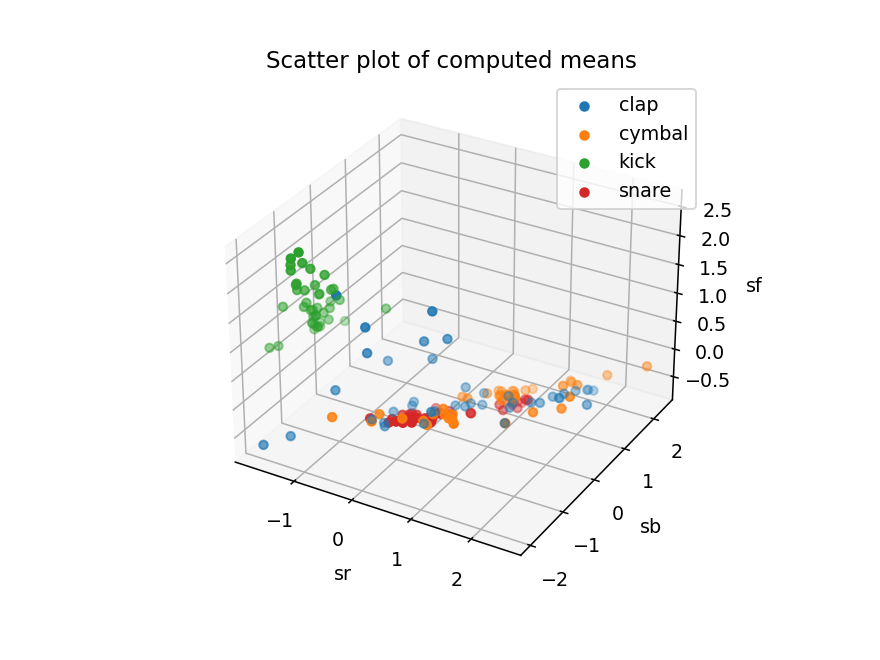

In [32]:
# plot the features
%matplotlib notebook
#fig = plt.figure(figsize = (15, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[np.where(labels == 0),f_dict[f1]], features[np.where(labels == 0),f_dict[f2]], features[np.where(labels == 0),f_dict[f3]], label = 'clap')
ax.scatter3D(features[np.where(labels == 1),f_dict[f1]], features[np.where(labels == 1),f_dict[f2]], features[np.where(labels == 1),f_dict[f3]], label = 'cymbal')
ax.scatter3D(features[np.where(labels == 2),f_dict[f1]], features[np.where(labels == 2),f_dict[f2]], features[np.where(labels == 2),f_dict[f3]], label = 'kick')
ax.scatter3D(features[np.where(labels == 3),f_dict[f1]], features[np.where(labels == 3),f_dict[f2]], features[np.where(labels == 3),f_dict[f3]], label = 'snare')


#plt.scatter(feature2[:,0], feature2[:,1])
plt.title('Scatter plot of computed means')
ax.set_xlabel(f1)
ax.set_ylabel(f2)
ax.set_zlabel(f3)
ax.legend()

<h2 style = "font-size:2rem;color:DarkCyan">3. Save Features</h2>

- scale features for better comparison (after this step features will present zero mean and unit variance)

In [33]:
#merging everything into a single data structure
dataset = pd.DataFrame(features)
dataset.columns = ['sc','bw','sf', 'sr', 'zcr', 'rms'] #naming the features
dataset['label'] = labels
dataset['filename'] = filenames

#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
dataset.to_csv('dataset.csv')
dataset

,sc,bw,sf,sr,zcr,rms,label,filename
0,1.798824,0.348337,-0.650937,1.103137,2.359166,-0.087440,0.0,clap00.wav
1,1.596986,1.284540,-0.455283,1.621357,1.448470,0.460283,0.0,clap01.wav
2,1.241764,0.983856,-0.582337,1.217733,1.530512,0.112806,0.0,clap02.wav
3,1.920064,0.897504,-0.481064,1.412264,2.719303,0.093284,0.0,clap03.wav
4,0.262470,-0.249038,-0.677210,0.038988,0.490405,-0.428324,0.0,clap04.wav
...,...,...,...,...,...,...,...,...
162,1.102880,0.973459,-0.551290,1.117861,1.413513,-0.314272,3.0,snare_37.wav
163,0.735877,0.711162,-0.601877,0.814952,0.905417,-0.293384,3.0,snare_38.wav
164,0.745683,0.924489,-0.628628,0.937689,0.223181,-0.347412,3.0,snare_39.wav
165,1.014002,1.034636,-0.603429,1.116316,0.660124,-0.320820,3.0,snare_40.wav
